#### Stop Words

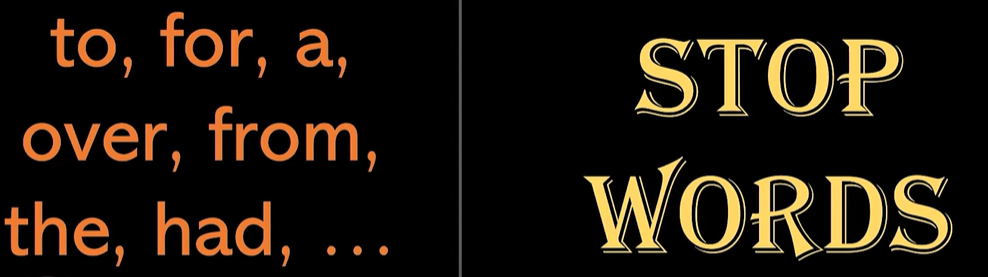

* In natural language processing (NLP), stop words are commonly used words that are often filtered out during the text preprocessing phase because they are considered to be of little value in terms of meaning. These words are extremely common in language but typically do not carry much information about the content of the text. Examples of stop words include "the," "and," "is," "in," "of," and so on.

* The stopwords can be removed, while doing text preprocessing.

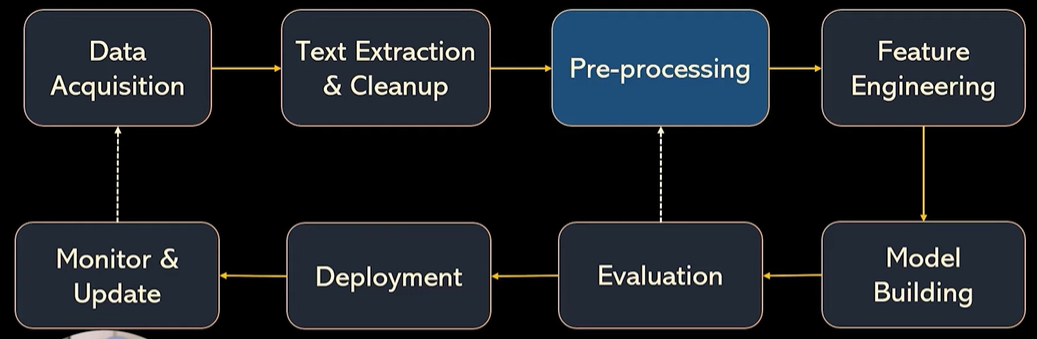

In [1]:
import spacy

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS

STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [3]:
len(STOP_WORDS)

326

* There are 326 stop words in the model.

In [4]:
nlp = spacy.load("en_core_web_sm")

doc=nlp('We just opened our wings, the flying part is coming soon')

for token in doc:
    if token.is_stop:
        print(token)

We
just
our
the
part
is


In [5]:
doc=nlp("hai iam damodhara, i want to become data scientist")

for token in doc:
    if token.is_stop:
        print(token)

i
to
become


* The above are stop words.

In [6]:
def preprocess(text):
    doc=nlp(text)
    
    no_stop_words=[token.text for token in doc if not token.is_stop and not token.is_punct]
    return no_stop_words 

In [7]:
preprocess("Musk wants time to prepare for a trail over his")

['Musk', 'wants', 'time', 'prepare', 'trail']

In [8]:
import pandas as pd

In [9]:
df=pd.read_json("C:/Users/Damodhara/Desktop/DSMP Dataset/doj_press.json", lines=True)

df.shape

(13087, 6)

In [10]:
df.head(5)

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13087 entries, 0 to 13086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12810 non-null  object
 1   title       13087 non-null  object
 2   contents    13087 non-null  object
 3   date        13087 non-null  object
 4   topics      13087 non-null  object
 5   components  13087 non-null  object
dtypes: object(6)
memory usage: 613.6+ KB


In [12]:
df=df[df['topics'].str.len()!=0]

In [13]:
df

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"
...,...,...,...,...,...,...
13081,14-1377,"Yuba City, California, Man Sentenced to 46 Mon...","Anthony Merrell Tyler, 34, of Yuba City, Calif...",2014-12-09T00:00:00-05:00,[Hate Crimes],"[Civil Rights Division, Civil Rights - Crimina..."
13082,16-735,Yuengling to Upgrade Environmental Measures to...,The Department of Justice and the U.S. Environ...,2016-06-23T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
13084,17-045,Zimmer Biomet Holdings Inc. Agrees to Pay $17....,Subsidiary Agrees to Plead Guilty to Violating...,2017-01-12T00:00:00-05:00,[Foreign Corruption],"[Criminal Division, Criminal - Criminal Fraud ..."
13085,17-252,ZTE Corporation Agrees to Plead Guilty and Pay...,ZTE Corporation has agreed to enter a guilty p...,2017-03-07T00:00:00-05:00,"[Asset Forfeiture, Counterintelligence and Exp...","[National Security Division (NSD), USAO - Texa..."


In [14]:
df.shape

(4688, 6)

In [15]:
df=df.head(100)

In [16]:
df.shape

(100, 6)

In [17]:
df['contents']

4      The U.S. Department of Justice, the U.S. Envir...
7      A 131-count criminal indictment was unsealed t...
19     The United States Attorney’s Office for the Mi...
22     21st Century Oncology LLC, has agreed to pay $...
23     21st Century Oncology Inc. and certain of its ...
                             ...                        
316    Doctor Hid Millions in Secret Accounts in Pana...
318    Defendant Concealed Bank Accounts in Panama an...
321    An Alaskan couple was charged in federal court...
322    A husband and wife pleaded guilty yesterday to...
324    A resident of Big Lake, Alaska was indicted on...
Name: contents, Length: 100, dtype: object

In [18]:
df['contents'].iloc[4]

'21st Century Oncology Inc. and certain of its subsidiaries and affiliates have agreed to pay $26 million to the government to resolve a self-disclosure relating to the submission of false attestations regarding the company’s use of electronic health records software and separate allegations that they violated the False Claims Act by submitting, or causing the submission of, claims for certain services provided pursuant to referrals from physicians with whom they had improper financial relationships. \xa0 “The Justice Department is committed to zealously investigating improper financial relationships that have the potential to compromise physicians’ medical judgment,” said Acting Assistant Attorney General Chad A. Readler of the Justice Department’s Civil Division.\xa0 “However, we will work with companies that accept responsibility for their past compliance failures and promptly take corrective action.”  \xa0 21st Century Oncology, which is headquartered in Fort Myers, Florida, owns a

In [19]:
len(df['contents'].iloc[4])

5504

In [20]:
df['contents_new']=df['contents'].apply(preprocess)

C:\Users\Damodhara\AppData\Local\Temp\ipykernel_13080\1285366360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contents_new']=df['contents'].apply(preprocess)


In [21]:
df.head()

,id,title,contents,date,topics,components,contents_new
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],"[U.S., Department, Justice, U.S., Environmenta..."
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division],"[131, count, criminal, indictment, unsealed, t..."
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U...","[United, States, Attorney, Office, Middle, Dis..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division],"[21st, Century, Oncology, LLC, agreed, pay, $,..."
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]","[21st, Century, Oncology, Inc., certain, subsi..."


In [22]:
#shape of the dataset before preprocessing of stop words
len(df['contents'].iloc[4])

5504

In [23]:
#shape of the dataset after preprocessing of stop words
len(df['contents_new'].iloc[4])

530

In [24]:
df["contents_new"].iloc[4][:300]

['21st',
 'Century',
 'Oncology',
 'Inc.',
 'certain',
 'subsidiaries',
 'affiliates',
 'agreed',
 'pay',
 '$',
 '26',
 'million',
 'government',
 'resolve',
 'self',
 'disclosure',
 'relating',
 'submission',
 'false',
 'attestations',
 'company',
 'use',
 'electronic',
 'health',
 'records',
 'software',
 'separate',
 'allegations',
 'violated',
 'False',
 'Claims',
 'Act',
 'submitting',
 'causing',
 'submission',
 'claims',
 'certain',
 'services',
 'provided',
 'pursuant',
 'referrals',
 'physicians',
 'improper',
 'financial',
 'relationships',
 '\xa0 ',
 'Justice',
 'Department',
 'committed',
 'zealously',
 'investigating',
 'improper',
 'financial',
 'relationships',
 'potential',
 'compromise',
 'physicians',
 'medical',
 'judgment',
 'said',
 'Acting',
 'Assistant',
 'Attorney',
 'General',
 'Chad',
 'A.',
 'Readler',
 'Justice',
 'Department',
 'Civil',
 'Division',
 '\xa0 ',
 'work',
 'companies',
 'accept',
 'responsibility',
 'past',
 'compliance',
 'failures',
 'promptl

In [25]:
df['contents'].iloc[4][:300]

'21st Century Oncology Inc. and certain of its subsidiaries and affiliates have agreed to pay $26 million to the government to resolve a self-disclosure relating to the submission of false attestations regarding the company’s use of electronic health records software and separate allegations that the'